In [1]:
# Quick example to show that a dictionary with keys that match the functions arguments will replace the
# default values with whatever variable is assigned to the key.
# Must input the dictionary into the function as **the_dictionary (see below)
def getDictionary(first='John', middle='Tim', last='Doe', month=1, day=1, year=2000, **extras):
    print(f'Hello {first} {middle} {last}! The date is {month}/{day}/{year}')

In [2]:
print(getDictionary())
print()

myDict = {'first':'Sam', 'middle':'Elizabeth', 'last':'McLean', 'day':12, 'month':6, 'year':2025}
print(getDictionary(**myDict))

Hello John Tim Doe! The date is 1/1/2000
None

Hello Sam Elizabeth McLean! The date is 6/12/2025
None


--------------

# Using `pdfplumber` to load in Table 2 of Johnson et. al. 2013

In [3]:
import pdfplumber
import numpy as np

# Load in the Johnson_2013 paper downloaded on this machine (grab only the page with the desired table on it)
pdf = pdfplumber.open("Johnson_2013_ApJ_772_8.pdf", pages = [5])
p5 = pdf.pages[0]

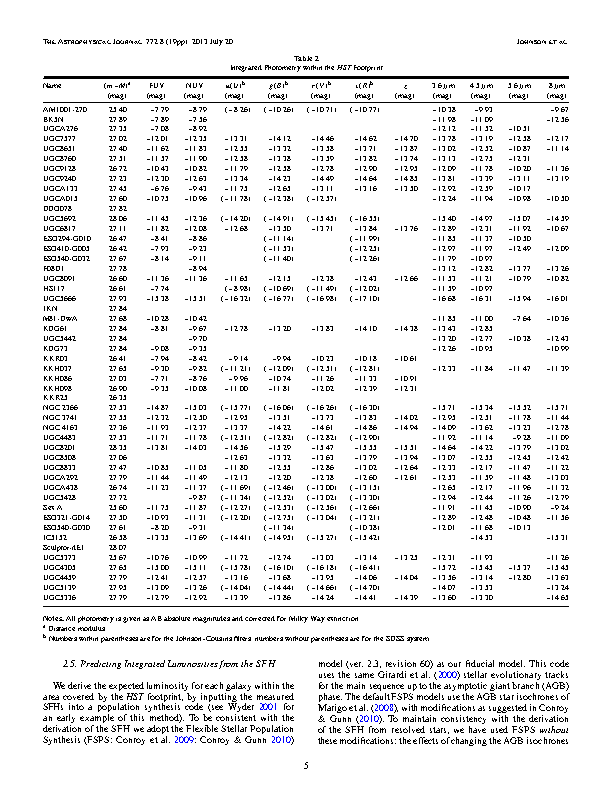

In [4]:
# Viewing the 5th page loaded in from the paper
im5 = p5.to_image()
im5

In [5]:
# Set the bounds on the table and crop it
x0, top, x1, bottom = 0, 79, 612, 606
bounds = (x0, top, x1, bottom)
table2 = p5.crop(bounds)

# Set the table settings extract_table() knows how to deliniate
table_settings = {"vertical_strategy": "text", 
                  "horizontal_strategy": "text"
                  }

# Extract table 2 from the pdf
table2 = table2.extract_table(table_settings)

# Do some restructuring with the header to your liking
# grab_header = table2[:2]
# header = []
header = table2[0]
# for item1,item2 in zip(grab_header[0], grab_header[1]):
#     if item2 == '':
#         header.append(item1)
#     else:
#         header.append(item1+' '+item2)
        
table2 = [header] + table2[3:]

In [6]:
# Convert table 2 to a pandas dataframe
import pandas as pd
df = pd.DataFrame(table2[1:], columns=table2[0])
df = df.set_index('Name')
df = df.replace('...', np.nan)
df = df.drop('(m−M)a', axis=1) # The '-' is the werid ascii minus sign (smh)
df

,FUV,NUV,u(U)b,g(B)b,r(V)b,i(R)b,z,3.6μm,4.5μm,5.6μm,8μm
Name,,,,,,,,,,,
AM1001-270,−7.79,−8.79,(−8.26),(−10.26),(−10.71),(−10.77),NaN,−10.38,−9.93,NaN,−9.67
BK5N,−7.89,−7.56,NaN,NaN,NaN,NaN,NaN,−11.98,−11.09,NaN,−12.56
UGCA276,−7.08,−8.92,NaN,NaN,NaN,NaN,NaN,−12.12,−11.52,−10.51,NaN
UGC7577,−12.01,−12.35,−13.31,−14.12,−14.46,−14.62,−14.70,−13.78,−13.19,−12.58,−12.17
UGC8651,−11.62,−11.83,−12.55,−13.32,−13.58,−13.71,−13.87,−13.02,−12.52,−10.87,−11.14
UGC8760,−11.57,−11.90,−12.58,−13.38,−13.59,−13.82,−13.74,−13.13,−12.75,−12.31,NaN
UGC9128,−10.43,−10.82,−11.79,−12.58,−12.78,−12.90,−12.95,−12.09,−11.78,−10.20,−11.36
UGC9240,−12.30,−12.63,−13.34,−14.23,−14.49,−14.64,−14.85,−13.81,−13.39,−13.11,−13.19
UGCA133,−6.76,−9.43,−11.75,−12.65,−13.11,−13.16,−13.50,−12.92,−12.59,−10.17,NaN


### The above pandas df still requires data pre-processing but is useful for hardcoding into the obs dictionary at the moment
- Replace all '(' and ')' with ''
- Change all values in the table to floats (instead of strings)
- Replace all ascii '-' with '-'

-------------

# Building getObs()

Create a getObs() function which specifies Signal to Noise Ratio (snr), Luminosity DISTance (ldist), and the photometric data for an object (obj) with filters and the magnitudes for each.

In [7]:
import sedpy
import numpy as np

In [8]:
# Building the run_params['obj'] from table 2
# Choose which object is being selected from table by changing i
i = 17
name = df.index[i]
df.loc[name]

print(name) # For object UGC8091
run_params = {}
run_params['obj'] = [-11.36,  -11.36, -11.65, -12.15, -12.38, -12.43, -12.66, -11.53, -11.21, -10.79, -10.82]
run_params['snr'] = 10.0
run_params['ldist'] = 10.0
run_params

UGC8091


{'obj': [-11.36,
  -11.36,
  -11.65,
  -12.15,
  -12.38,
  -12.43,
  -12.66,
  -11.53,
  -11.21,
  -10.79,
  -10.82],
 'snr': 10.0,
 'ldist': 10.0}

In [9]:
# For object NGC4163 instead, use
# run_params['obj'] = [-11.93, -12.37, -13.37, -14.22, -14.61, -14.86, -14.94, -14.09, -13.62, -13.23, -12.78]

In [10]:
def getObs(snr=10, ldist=10.0, obj=[], **extras_):
    
    from prospect.utils.obsutils import fix_obs
    import sedpy
    
    # obs is a dictionary of observational data to use for the fit
    obs = {}
    
    galex = ['galex_'+a for a in ['FUV', 'NUV']]
    sdss = [f'sdss_{c}0' for c in ['u', 'g', 'r', 'i', 'z']]
    spitzer = ['spitzer_irac_ch'+b for b in ['1', '2', '3', '4']]
    filternames = galex + sdss + spitzer
    
    obs['filters'] = sedpy.observate.load_filters(filternames)
    
    M_AB = np.array(obj)

    dm = 25 + 5.0 * np.log10(ldist)
    mags = M_AB + dm
    
    obs['maggies'] = 10**(-0.4*mags)
    obs['maggies_unc'] = (1./snr) * obs['maggies']
    
    obs['phot_mask'] = np.array(['spitzer' not in f.name for f in obs['filters']])
    obs['phot_wave'] = np.array([f.wave_effective for f in obs['filters']])

    obs['wavelength'] = None
    obs['spectrum'] = None
    obs['unc'] = None
    obs['mask'] = None
    
    obs = fix_obs(obs)
    
    return obs

In [11]:
obs = getObs(**run_params)
obs

{'filters': [<class 'sedpy.observate.Filter'>(galex_FUV),
  <class 'sedpy.observate.Filter'>(galex_NUV),
  <class 'sedpy.observate.Filter'>(sdss_u0),
  <class 'sedpy.observate.Filter'>(sdss_g0),
  <class 'sedpy.observate.Filter'>(sdss_r0),
  <class 'sedpy.observate.Filter'>(sdss_i0),
  <class 'sedpy.observate.Filter'>(sdss_z0),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch1),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch2),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch3),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch4)],
 'maggies': array([3.49945167e-08, 3.49945167e-08, 4.57088190e-08, 7.24435960e-08,
        8.95364766e-08, 9.37562007e-08, 1.15877736e-07, 4.09260660e-08,
        3.04789499e-08, 2.07014135e-08, 2.12813905e-08]),
 'maggies_unc': array([3.49945167e-09, 3.49945167e-09, 4.57088190e-09, 7.24435960e-09,
        8.95364766e-09, 9.37562007e-09, 1.15877736e-08, 4.09260660e-09,
        3.04789499e-09, 2.07014135e-09, 2.12813905e-09]),
 'phot_mask': array([ T

In [12]:
print('Obs dictionary keys:\n\n{}\n'.format(obs.keys()))

Obs dictionary keys:

dict_keys(['filters', 'maggies', 'maggies_unc', 'phot_mask', 'phot_wave', 'wavelength', 'spectrum', 'unc', 'mask', 'filternames', 'logify_spectrum', 'ndof'])



In [13]:
print('Obs filter objects:\n')
print(obs['filters'])

Obs filter objects:

[<class 'sedpy.observate.Filter'>(galex_FUV), <class 'sedpy.observate.Filter'>(galex_NUV), <class 'sedpy.observate.Filter'>(sdss_u0), <class 'sedpy.observate.Filter'>(sdss_g0), <class 'sedpy.observate.Filter'>(sdss_r0), <class 'sedpy.observate.Filter'>(sdss_i0), <class 'sedpy.observate.Filter'>(sdss_z0), <class 'sedpy.observate.Filter'>(spitzer_irac_ch1), <class 'sedpy.observate.Filter'>(spitzer_irac_ch2), <class 'sedpy.observate.Filter'>(spitzer_irac_ch3), <class 'sedpy.observate.Filter'>(spitzer_irac_ch4)]


-----------------------

# Plotting the photometric data (and the filters) from the obs dictionary

In [14]:
from matplotlib.pyplot import *

In [15]:
wphot = obs['phot_wave'] # List of the effective wavelengths at which the photometry was taken for each filter

In [16]:
# Establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
ymin, ymax = obs['maggies'].min()*0.8, obs['maggies'].max()/0.8

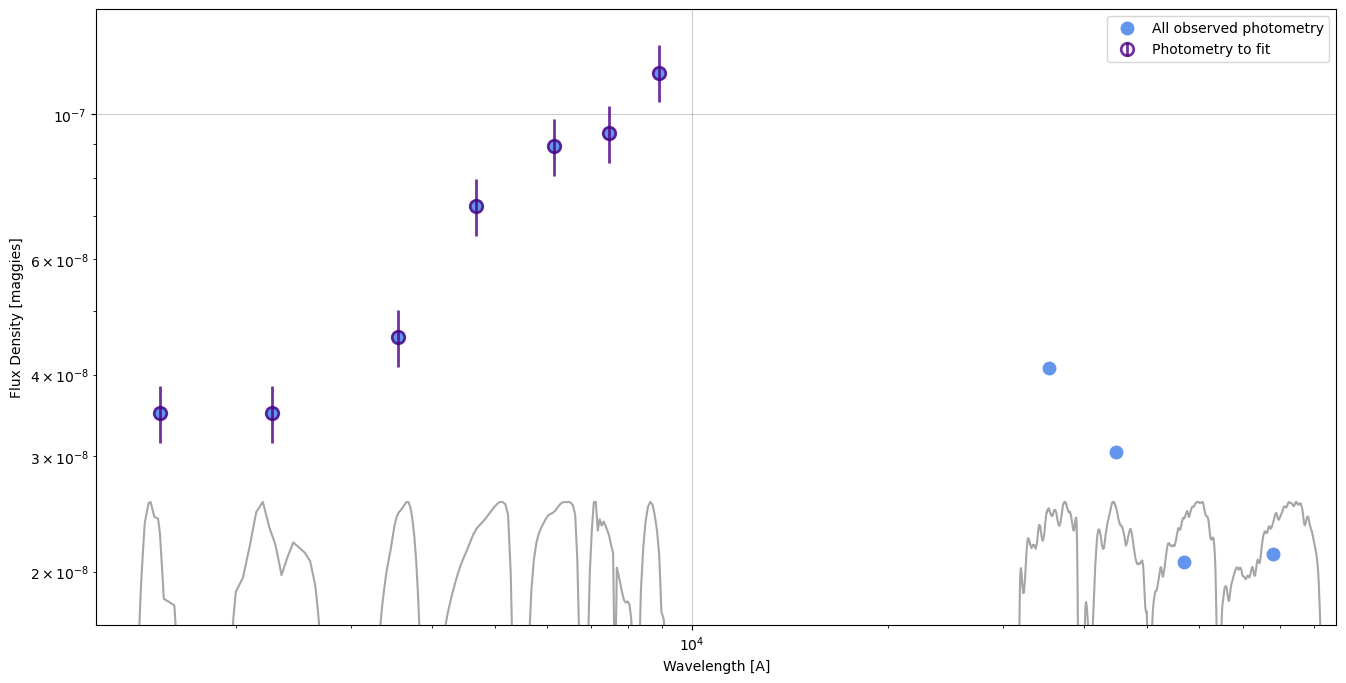

In [38]:
# Have to set the figure size *before* plotting onto the figure
figure(figsize=(16,8))

# Plot all the data
plot(wphot, obs['maggies'], label='All observed photometry',
     marker='o', markersize=9, ls='', lw=3, color='cornflowerblue')

# Plott the circles and error bars on the useable photometry
mask = obs['phot_mask'] # We created this mask in build obs so we could ignore longer wavelength filters
errorbar(wphot[mask], obs['maggies'][mask],
         yerr=obs['maggies_unc'][mask], label='Photometry to fit',
         marker='o', markersize=9, alpha=0.8, ls='', lw=2, ecolor='indigo', markerfacecolor='none',
         markeredgecolor='indigo', markeredgewidth=2)

# Plot the filters
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t/t.max()
    t = 10**(0.2*(np.log10(ymax/ymin))) * t * ymin
    loglog(w,t, color='gray', alpha=0.7)

# Changing axes settings
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
xscale('log')
yscale('log')
grid(color='gray', alpha=0.4)
legend(loc='best')
show()

---------------------

# Building the model object by varying parameters

The model object stores the parameters used by the SPS object to build a spectrum, and the priors on those parameters (and it stores which parameters are to be varied i.e. which ones are free parameters).

The `theta` attribute: a vector of parameter values used by the MCMC samplers or optimizers

The `params` attribute: the dictionary of parameter names and values that can be passed to the SPS objects' `get_spectrum()` method.


### To create the model, we need:
- list (or dictionary) of model parameters the following information:
    - `name`
    - length `N`
    - initial value `init`
    - free or fixed parameter via the `isfree` key
    (free parameters *must* have a prior specified as well from the `priors` module)

In [39]:
from prospect.models import priors

In [108]:
mass_param = {'name': 'mass',
              'N': 1,
              'isfree': True,
              'init': 5e7,
              'prior': priors.LogUniform(mini=1e6, maxi=1e12),
              'init_disp': 1e6,
              'disp_floor': 1e6,
              'units': 'solar masses formed',
             }

In [109]:
mass_param['init']

50000000.0

In [104]:
mass_param['init']

50000000.0

In [88]:
from prospect.models.templates import TemplateLibrary

In [89]:
# TemplateLibrary.describe('parametric_sfh')
TemplateLibrary.show_contents()

'type_defaults':
  Explicitly sets dust amd IMF types.
'ssp':
  Basic set of (free) parameters for a delta function SFH
'parametric_sfh':
  Basic set of (free) parameters for a delay-tau SFH.
'dust_emission':
  The set of (fixed) dust emission parameters.
'nebular':
  The set of nebular emission parameters, with gas_logz tied to stellar logzsol.
'nebular_marginalization':
  Marginalize over emission amplitudes line contained inthe observed spectrum
'fit_eline_redshift':
  Fit for the redshift of the emission lines separatelyfrom the stellar redshift
'agn_eline':
  Add AGN emission lines
'outlier_model':
  The set of outlier (mixture) models for spectroscopy and photometry
'agn':
  The set of (fixed) AGN dusty torus emission parameters.
'igm':
  The set of (fixed) IGM absorption parameters.
'spectral_smoothing':
  Set of parameters for spectal smoothing.
'optimize_speccal':
  Set of parameters (most of which are fixed) for optimizing a polynomial calibration vector.
'fit_speccal':
  Set

In [110]:
def build_model(object_redshift=None, ldist=10.0, fixed_metallicity=None, add_duste=False, **extras):
    """Build a prospect.models.SedModel object
    
    :param object_redshift: (optional, default: None)
        If given, produce spectra and observed frame photometry appropriate
        for this redshift. Otherwise, the redshift will be zero.
        
    :param ldist: (optional, default: 10)
        The luminosity distance (in Mpc) for the model. Spectra and observed
        frame (apparent) photometry will be appropriate for this luminosity distance.
        
    :param fixed_metallicity: (optional, default: None)
        If given, fix the model metallicity  (:math: `log(Z/Z_sun)`) to the given value.
        
    :param add_duste: (optional, default: False)
        If `True`, add dust emission and associated (fixed) parameters to the model.
        
    :returns model:
        An instance of prospect.models.SedModel    
    """
    from prospect.models.sedmodel import SedModel
    from prospect.models.templates import TemplateLibrary
    from prospect.models import priors
    
    model_params = TemplateLibrary['parametric_sfh']

    model_params['lumdist'] = {'N': 1, 'isfree': False, 'init': ldist, 'units': 'Mpc'}
  
    model_params['zred']['init'] = 0.0
    model_params['dust2']['init'] = 0.05
    model_params['logzsol']['init'] = -0.5
    model_params['tage']['init'] = 13.
    model_params['mass']['init'] = 5e7 # This is the intial value being used for mass
    
    model_params['dust2']['prior'] = priors.TopHat(mini=0.0, maxi=2.0)
    model_params['tau']['prior'] = priors.LogUniform(mini=1e-1, maxi=1e2)
    model_params['mass']['prior'] = priors.LogUniform(mini=1e6, maxi=1e10)
    
    model_params['mass']['disp_floor'] = 1e6
    model_params['tau']['disp_floor'] = 1.0
    model_params['tage']['disp_floor'] = 1.0
    
    if fixed_metallicity is not None:
        model_params['logzsol']['isfree'] = False
        model_params['logzsol']['init'] = fixed_metallicity
        
    if object_redshift is not None:
        model_params['zred']['isfree'] = False
        model_params['zred']['init'] = object_redshift
        
    if add_duste:
        model_params.update(TemplateLibrary['dust_emission'])
        
    model = SedModel(model_params)
    
    return model

In [111]:
run_params = {}
run_params['snr'] = 10.0
run_params['ldist'] = 10.0
run_params['object_redshift'] = 0.0
run_params['fixed_metallicity'] = None
run_params['add_duste'] = True

In [112]:
model = build_model(**run_params)

In [113]:
print(model)

:::::::
<class 'prospect.models.sedmodel.SedModel'>

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=1000000.0,maxi=10000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=0.1,maxi=100.0)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: [0.] 
  sfh: [4] 
  imf_type: [2] 
  dust_type: [0] 
  lumdist: [10.] 
  add_dust_emission: [ True] 
  duste_umin: [1.] 
  duste_qpah: [4.] 
  duste_gamma: [0.001] 


In [114]:
model.theta

array([ 5.0e+07, -5.0e-01,  5.0e-02,  1.3e+01,  1.0e+00])

In [115]:
model.params

{'zred': array([0.]),
 'mass': array([50000000.]),
 'logzsol': array([-0.5]),
 'dust2': array([0.05]),
 'sfh': array([4]),
 'tage': array([13.]),
 'imf_type': array([2]),
 'dust_type': array([0]),
 'tau': array([1]),
 'lumdist': array([10.]),
 'add_dust_emission': array([ True]),
 'duste_umin': array([1.]),
 'duste_qpah': array([4.]),
 'duste_gamma': array([0.001])}

In [116]:
def build_sps(zcontinuous=1, **extras):
    """
    :param zcontinuous:
        A value of 1 ensures that we use interpolation between SSPs to
        have a continuous metallicity parameter (`logzsol`)
        See python-FSPS documentation for details
    """
    from prospect.sources import CSPSpecBasis
    sps = CSPSpecBasis(zcontinuous=zcontinuous)
    return sps

run_params['zcontinuous'] = 1

In [117]:
sps = build_sps(**run_params)
help(sps.get_spectrum)

Help on method get_spectrum in module prospect.sources.ssp_basis:

get_spectrum(outwave=None, filters=None, peraa=False, **params) method of prospect.sources.galaxy_basis.CSPSpecBasis instance
    Get a spectrum and SED for the given params.

    :param outwave: (default: None)
        Desired *vacuum* wavelengths.  Defaults to the values in
        ``sps.wavelength``.

    :param peraa: (default: False)
        If `True`, return the spectrum in erg/s/cm^2/AA instead of AB
        maggies.

    :param filters: (default: None)
        A list of filter objects for which you'd like photometry to be calculated.

    :param params:
        Optional keywords giving parameter values that will be used to
        generate the predicted spectrum.

    :returns spec:
        Observed frame spectrum in AB maggies, unless ``peraa=True`` in which
        case the units are erg/s/cm^2/AA.

    :returns phot:
        Observed frame photometry in AB maggies.

    :returns mass_frac:
        The ratio o

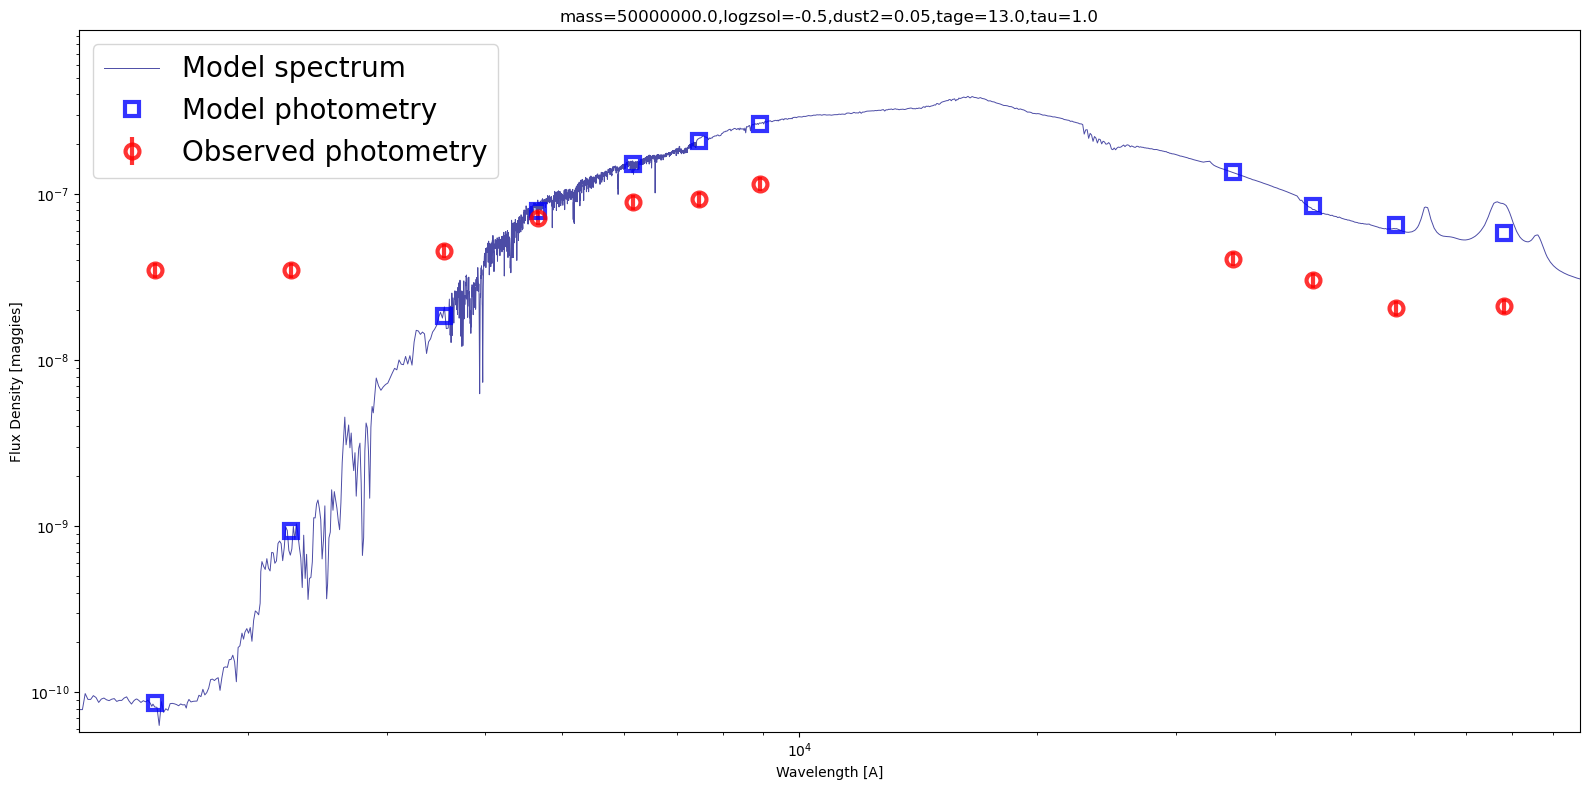

In [118]:
# Generate the model SED at the initial value of theta
theta = model.theta.copy()
initial_spec, initial_phot, initial_mfrac = model.sed(theta, obs=obs, sps=sps)
title_text = ','.join(["{}={}".format(p, model.params[p][0])
                       for p in model.free_params])

a = 1.0 + model.params.get('zred', 0.0) # Cosmological redshifting
# Photometric effective wavelengths
wphot = obs['phot_wave']
# Spectroscopic wavelengths
if obs['wavelength'] is None:
    # *restframe* spectral wavelengths, since obs['wavelength'] is None
    wspec = sps.wavelengths
    wspec *= a # redshift them
else:
    wspec = obs['wavelength']
    
# Establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
ymin, ymax = temp.min()*0.8, temp.max()/0.4
figure(figsize=(16,8))

# Plot model + data
loglog(wspec, initial_spec, label='Model spectrum',
       lw=0.7, color='navy', alpha=0.7)
errorbar(wphot, initial_phot, label='Model photometry',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3,
         markerfacecolor='none', markeredgecolor='blue',
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'],
         label='Observed photometry', marker='o',
         markersize=10, alpha=0.8, ls='', lw=3, ecolor='red',
         markerfacecolor='none', markeredgecolor='red',
         markeredgewidth=3)
title(title_text)
    
# Prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
legend(loc='best', fontsize=20)
tight_layout()

show()

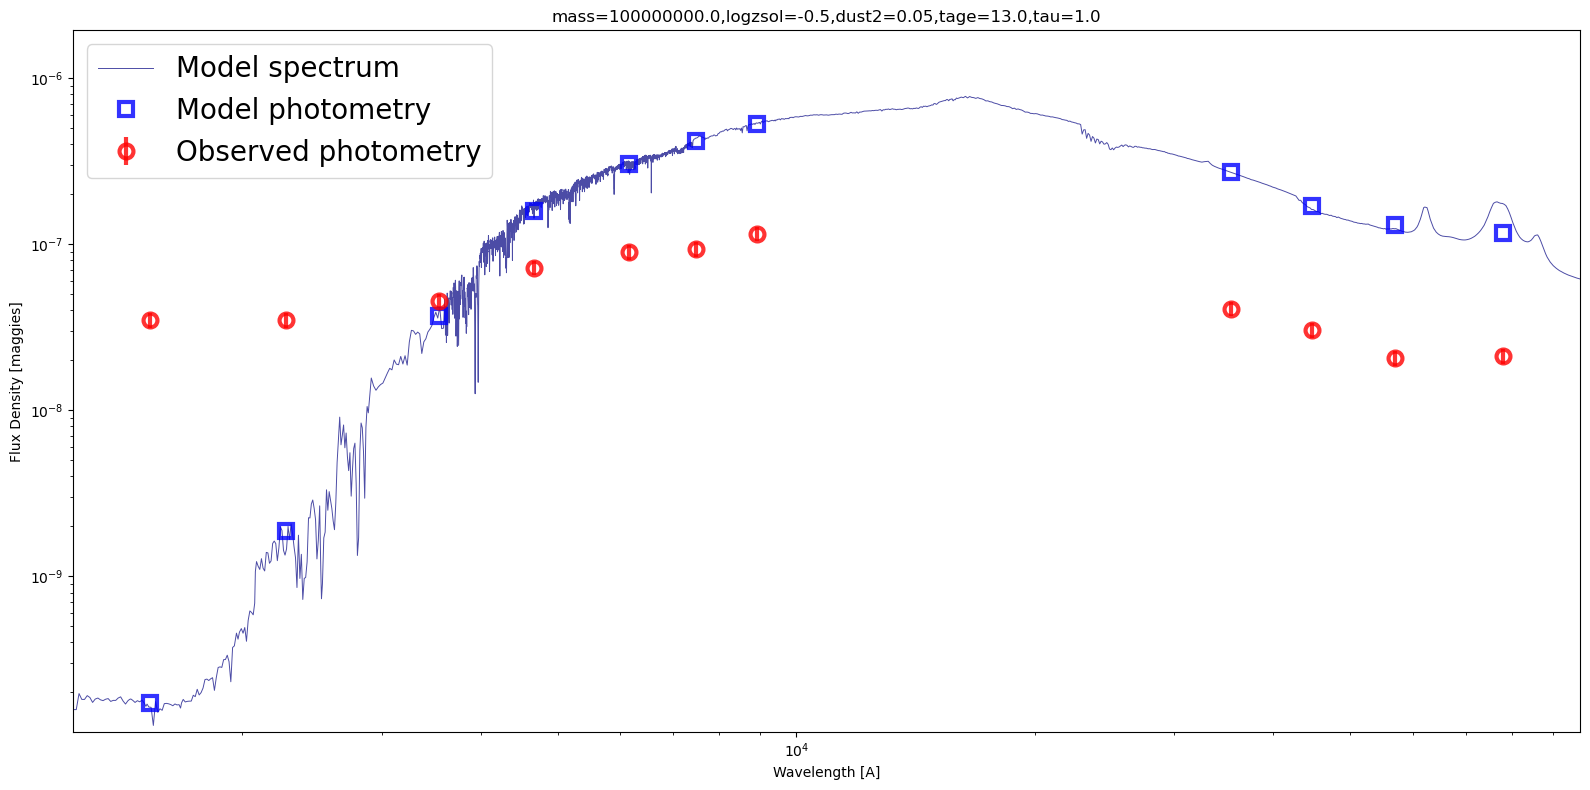

In [73]:
# Generate the model SED at the initial value of theta
theta = model.theta.copy()
initial_spec, initial_phot, initial_mfrac = model.sed(theta, obs=obs, sps=sps)
title_text = ','.join(["{}={}".format(p, model.params[p][0])
                       for p in model.free_params])

a = 1.0 + model.params.get('zred', 0.0) # Cosmological redshifting
# Photometric effective wavelengths
wphot = obs['phot_wave']
# Spectroscopic wavelengths
if obs['wavelength'] is None:
    # *restframe* spectral wavelengths, since obs['wavelength'] is None
    wspec = sps.wavelengths
    wspec *= a # redshift them
else:
    wspec = obs['wavelength']
    
# Establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
ymin, ymax = temp.min()*0.8, temp.max()/0.4
figure(figsize=(16,8))

# Plot model + data
loglog(wspec, initial_spec, label='Model spectrum',
       lw=0.7, color='navy', alpha=0.7)
errorbar(wphot, initial_phot, label='Model photometry',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3,
         markerfacecolor='none', markeredgecolor='blue',
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'],
         label='Observed photometry', marker='o',
         markersize=10, alpha=0.8, ls='', lw=3, ecolor='red',
         markerfacecolor='none', markeredgecolor='red',
         markeredgewidth=3)
title(title_text)
    
# Prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
legend(loc='best', fontsize=20)
tight_layout()

show()